In [1]:
import pandas as pd
from matplotlib.lines import Line2D  
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
ds  = pd.read_csv("LargeExecTime2.csv",sep=';', header = None)
ds.columns =['file','status','startTime','stopTime','duration']
ds['startTime'] = pd.to_datetime(ds['startTime'],format='%Y-%m-%d %H:%M:%S.%f %z')
ds['stopTime'] = pd.to_datetime(ds['stopTime'],format='%Y-%m-%d %H:%M:%S.%f %z')
ds['file'] = ds['file'].str.replace('CTA_Task_','')
ds.drop(['status'],inplace=True,axis=1)

In [4]:
ds.head()

,file,startTime,stopTime,duration
0,GPSMETAL1,2020-08-05 02:08:41.266754800+02:00,2020-08-05 02:08:42.126142200+02:00,1
1,GPSMETAL2,2020-08-05 02:08:45.692234+02:00,2020-08-05 02:08:46.504753500+02:00,1
2,GPSMETAL_ANNEXE,2020-08-05 02:08:51.678580300+02:00,2020-08-05 02:08:53.305623300+02:00,2
3,PURGESPEC,2020-08-05 03:08:46.036000600+02:00,2020-08-05 03:10:53.937244400+02:00,127
4,GPSMETAL1,2020-08-05 03:09:01.600372800+02:00,2020-08-05 03:09:02.444160600+02:00,1


In [5]:
ds['file'].value_counts()

GPSMETAL2                     728
GPSMETAL_ANNEXE               728
GPSMETAL1                     728
GPSDUE                        516
GPSUE                         515
PURGEKO                       123
GP                             92
GPSCPTUMPL                     62
GPSCPTUMRE                     62
GPSBRAECH                      61
GPSMODULE                      61
GPSBRAP                        61
GPSBRIN                        61
GPSLOT                         61
NGCBAT                         61
NGCGROUPBAT                    61
NGCNPCALARM                    61
GPSBILX                        33
GPSMVTM2                       32
GPSRESS1                       32
GPSCOUKORE                     31
GPSPGM                         31
GPSHISTRAP                     31
GCORATIO2                      31
GPSCOUKORE_ALERTES             31
PURGEEXP                       31
NGCSTOCK                       31
NGCSPECSOLART                  31
GPSGRPGIG                      31
MRP_ZCEM_PAR  

In [6]:
fileMean = ds.groupby(ds['file']).mean()
fileMean.nlargest(n=15,columns=['duration']).sort_values(by='duration',ascending=False)

,duration
file,
GPSMVTV,3173.225806
GPSMVTM2,2299.031250
GPSMVTM,931.838710
GPSTRAV,723.709677
GPSWAG,588.032258
AUDIT,544.741935
GPSUM,530.612903
GPSHISPRO,469.612903
ECOTBOCMPROD,381.400000


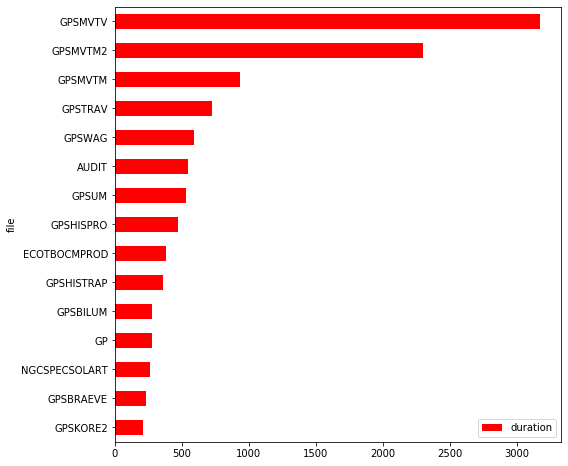

In [7]:
fileMean.nlargest(n=15,columns=['duration']).sort_values(by='duration').plot(kind='barh',y='duration',color='r',figsize=(8,8))

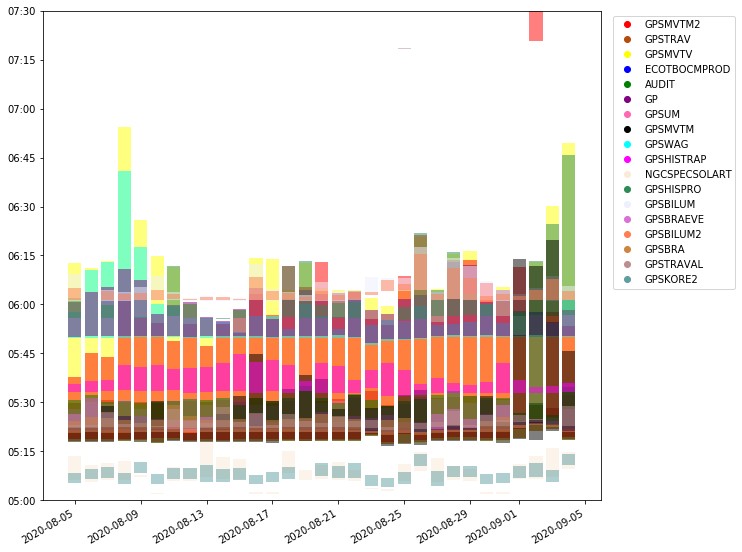

In [56]:
def plot_durations_(starts, stops, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    kwargs['align'] = kwargs.get('align', 'center')

    starts, stops = mpl.dates.date2num(starts), mpl.dates.date2num(stops)

    # Break things into start days and start times 
    start_times = starts % 1
    start_days = starts - start_times
    durations = stops - starts
    start_times += int(starts[0]) # So that we have a valid date...    
    
    # Plot the bars
    artist = ax.bar(start_days, durations, bottom=start_times, **kwargs)

    # Tell matplotlib to treat the axes as dates...
    ax.xaxis_date()
    ax.yaxis_date()
    ax.figure.autofmt_xdate()
    
    return artist


color_dict = {'GPSMVTM2': 'red', 'GPSTRAV': '#b54c0e', 'GPSMVTV': 'yellow','ECOTBOCMPROD': 'blue', 'AUDIT': 'green',
'GP': 'purple', 'GPSUM': '#ff69b4', 'GPSMVTM': 'black', 'GPSWAG': 'cyan', 'GPSHISTRAP': 'magenta', 'NGCSPECSOLART': '#faebd7',
'GPSHISPRO': '#2e8b57', 'GPSBILUM': '#eeefff', 'GPSBRAEVE': '#da70d6', 'GPSBILUM2': '#ff7f50', 'GPSBRA': '#cd853f',
'GPSTRAVAL': '#bc8f8f', 'GPSKORE2': '#5f9ea0'}


fig, ax = plt.subplots(figsize=(10, 10))
for file in ds[ds["duration"]>300]['file'].unique():
    dsF = ds[ds['file']==file]
    plot_durations_(dsF['startTime'].to_numpy(), dsF['stopTime'].to_numpy(), ax, facecolor=color_dict[file], alpha=0.5)
    
#start, end = ax.get_ylim()

start = datetime.strptime("2020-08-05 05:00:00+02:00", '%Y-%m-%d %H:%M:%S%z')
end = datetime.strptime("2020-08-05 07:30:00+02:00", '%Y-%m-%d %H:%M:%S%z')

start_ = mpl.dates.date2num(start)
end_ = mpl.dates.date2num(end)
ax.set_ylim(bottom = start_, top = end_, auto = False, emit = True )
ax.set_yticklabels(['05:00','05:15','05:30','05:45','06:00','06:15','06:30','06:45','07:00','07:15','07:30'])  

markers=[]
for color in color_dict.values():
    line = Line2D([0,0],[0,0],color=color,marker='o',linestyle='')
    markers.append(ax.add_line(line))
 
ax.legend(markers, color_dict.keys(), numpoints=1, loc='upper right',bbox_to_anchor=(1.25, 1))

plt.show()


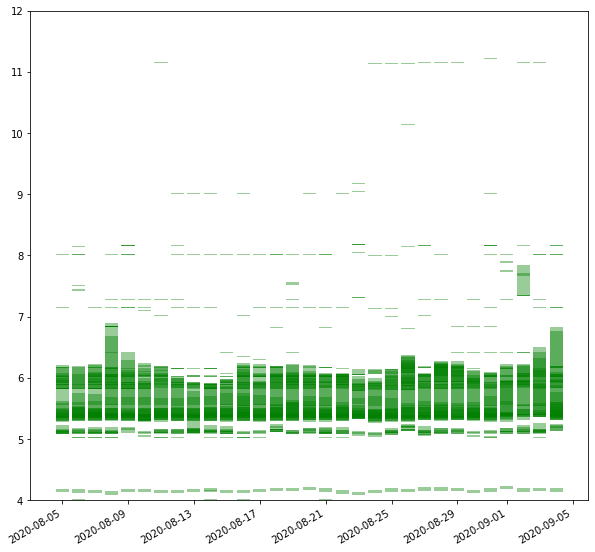

In [46]:
from datetime import datetime
fig, ax = plt.subplots(figsize=(10, 10))
for file in ds['file'].unique():
    dsF = ds[ds['file']==file]
    plot_durations_(dsF['startTime'].to_numpy(), dsF['stopTime'].to_numpy(), ax, facecolor='green', alpha=0.4)


start = datetime.strptime("2020-08-05 04:00:00+02:00", '%Y-%m-%d %H:%M:%S%z')
end = datetime.strptime("2020-08-05 12:00:00+02:00", '%Y-%m-%d %H:%M:%S%z')

start_ = mpl.dates.date2num(start)
end_ = mpl.dates.date2num(end)
ax.set_ylim(bottom = start_, top = end_, auto = False, emit = True )
ax.set_yticklabels([x for x in range(4,13)])   
plt.show()